In [5]:
import numpy as np
a = np.arange(0, 10, 0.5)
print(len(a),a) #0~10까지 0.5 간격으로 값 생성

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


In [6]:
data = np.sin(a)
print(data)
print(len(data))

[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [7]:
timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측
X, y = [], []

for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)    
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [10]:
print(np.array(range(3,len(data))))
print(np.array(range(3,0,-1)))
print(data)
print('x= ', data[3-3], data[3-2], data[3-1], 'y= ',data[3])
print('x= ', data[4-3], data[4-2], data[4-1], 'y= ',data[4])
print('x= ', data[5-3], data[5-2], data[5-1], 'y= ',data[5])

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[3 2 1]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
x=  0.0 0.479425538604203 0.8414709848078965 y=  0.9974949866040544
x=  0.479425538604203 0.8414709848078965 0.9974949866040544 y=  0.9092974268256817
x=  0.8414709848078965 0.9974949866040544 0.9092974268256817 y=  0.5984721441039564


In [5]:
#신경망에 입력하기 위해 차원 변경

X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
### X는 3차원으로, len(X) 샘플수, 3 타임스탭, 1 변수개수
### y는 2차원으로
print(X.shape)
print(y.shape)


(17, 3, 1)
(17, 1)


In [21]:
np.array(X).reshape(len(X), 3, 1)

array([[[ 0.        ],
        [ 0.47942554],
        [ 0.84147098]],

       [[ 0.47942554],
        [ 0.84147098],
        [ 0.99749499]],

       [[ 0.84147098],
        [ 0.99749499],
        [ 0.90929743]],

       [[ 0.99749499],
        [ 0.90929743],
        [ 0.59847214]],

       [[ 0.90929743],
        [ 0.59847214],
        [ 0.14112001]],

       [[ 0.59847214],
        [ 0.14112001],
        [-0.35078323]],

       [[ 0.14112001],
        [-0.35078323],
        [-0.7568025 ]],

       [[-0.35078323],
        [-0.7568025 ],
        [-0.97753012]],

       [[-0.7568025 ],
        [-0.97753012],
        [-0.95892427]],

       [[-0.97753012],
        [-0.95892427],
        [-0.70554033]],

       [[-0.95892427],
        [-0.70554033],
        [-0.2794155 ]],

       [[-0.70554033],
        [-0.2794155 ],
        [ 0.21511999]],

       [[-0.2794155 ],
        [ 0.21511999],
        [ 0.6569866 ]],

       [[ 0.21511999],
        [ 0.6569866 ],
        [ 0.93799998]],

      

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
np.random.seed(0)
model=Sequential()
model.add(SimpleRNN(units=10, input_shape=(3, 1)))   # units 출력노드수, input_shape 샘플수는 중요하지 않음. 타임스텝, 변수개수
# input에 (3,1)
# hidden1 simpleRNN 에서 3번 순환   
model.add(Dense(5, activation='relu'))    # hidden2: 10
model.add(Dense(1, activation='linear'))  # hidden3: 5
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [22]:
from datetime import datetime  
import tensorflow as tf  
logdir="c:/workspace/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/workspace/logs/20230725-131738'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(X, y, epochs=1000,callbacks=[tensorboard_callback])
# anaconda prompt에서 실행
# tensorboard --logdir=c:/logs/20230508-153907

Epoch 1/1000
1/1 [==============================] - 0s 54ms/step - loss: 2.4723e-04
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4714e-04
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.4705e-04
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4696e-04
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4688e-04
Epoch 6/1000
1/1 [==============================] - 0s 22ms/step - loss: 2.4679e-04
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.4670e-04
Epoch 8/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.4662e-04
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4653e-04
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4644e-04
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4635e-04
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 

In [24]:
model.evaluate(X,y)

1/1 [==============================] - 0s 25ms/step - loss: 1.9520e-04


0.00019519955094438046

1/1 [==============================] - 0s 21ms/step


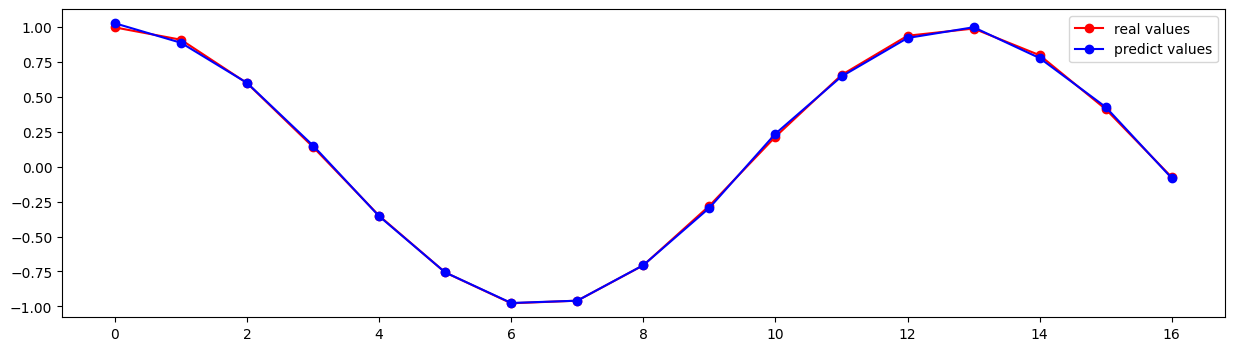

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 4))
# 실제값
plt.plot(data[3:], 'ro-', label='real values') 
#예측값
plt.plot(model.predict(X), 'bo-', label='predict values')
plt.legend()
plt.show()
